In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv("student.csv")
df=df.drop("Unnamed: 0",axis=1)
df

,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,5141,22,Female,State,50%,Yes,Yes,Private,0,Always,No,Yes,No,Yes,CC
141,5142,18,Female,State,75%,No,No,Private,0,Never,No,Yes,Yes,No,CC
142,5143,18,Female,Private,75%,No,No,Private,0,Always,Yes,No,No,No,AA
143,5144,22,Female,State,75%,Yes,Yes,Bus,12,Sometimes,No,Yes,No,Yes,CB


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i]) 
df

,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,1,0,2,1,0,1,0,1,1,2,1,0,0
1,5002,20,1,0,2,1,0,1,0,1,1,1,2,1,0
2,5003,21,1,2,2,0,0,1,2,2,0,1,1,1,0
3,5004,18,0,1,2,1,0,0,2,1,0,2,1,0,0
4,5005,22,1,1,2,0,0,0,12,1,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,5141,22,0,2,2,1,1,1,0,1,0,2,1,1,4
141,5142,18,0,2,3,0,0,1,0,2,0,2,2,0,4
142,5143,18,0,1,3,0,0,1,0,1,1,1,1,0,0
143,5144,22,0,2,3,1,1,0,12,3,0,2,1,1,3


In [4]:
x=df.drop("Grade",axis=1)
y=df["Grade"]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model=RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 5, 4, 0, 0, 0, 6, 6, 6, 0,
       0, 1, 2, 1, 0, 5, 1])

In [8]:
accuracy=accuracy_score(y_test,y_pred)   
accuracy
print(f"accuracy score{accuracy*100:0.2f}%")

accuracy score24.14%


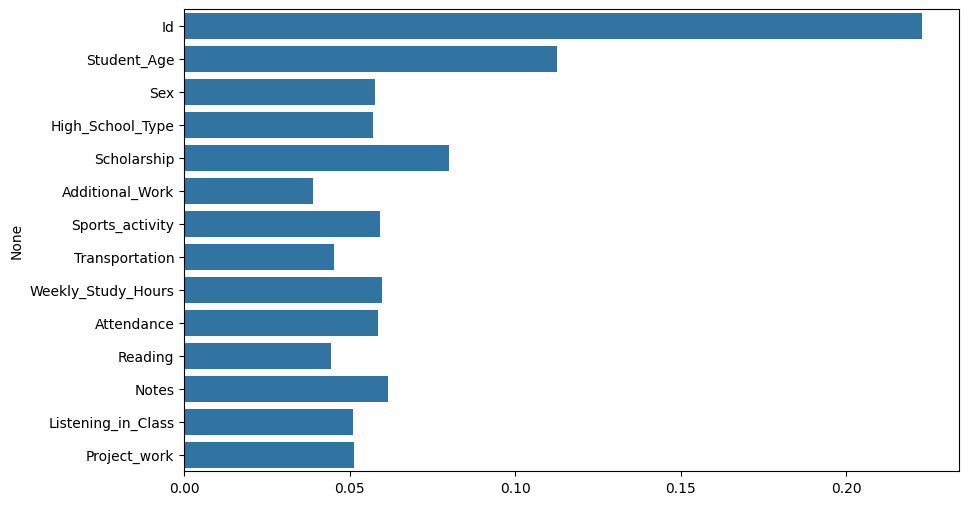

In [9]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [10]:
new=pd.DataFrame({
    "Id":[5001],
    "Student_Age":[12],
    "Sex":["Male"],
    "High_School_Type":["Other"],
    "Scholarship":["50%"],
    "Additional_Work":["Yes"],
    "Sports_activity":["No"],
    "Transportation":["Private"],
    "Weekly_Study_Hours":[0],
    "Attendance":["Always"],
    "Reading":["Yes"],
    "Notes":["Yes"],
    "Listening_in_Class":["No"],
    "Project_work":["No"],
    
})
for i in new.select_dtypes(include=["object"]):
    new[i]=label.fit_transform(new[i])
pred=model.predict(new)
pred

array([0])